# FINAL PROJECT 2 - DATA GEEKS

Nama Kelompok:
1. Christian Lamhot Tua
2. Pedro Putrananda Lende

**Konsep Dasar Logistic Regression dan SVM**
1. Logistic Regression

Konsep yang digunakan dalam Logistic Regression hampir sama dengan Linear Regression, namun nilai *output* Logistic Regression berada di antara 0 dan 1 (Binary Logistic Regression). Saat menerapkan Logistic Regression dari beberapa variabel dependen $y$ pada kumpulan variabel independen $x = (x_1,...,x_r)$ dengan $r$ adalah jumlah prediktor, dimulai dengan nilai prediktor yang diketahui $x_i$ dan respon aktual yang sesuai $y_i$ untuk setiap observasi. Tujuannya adalah menemukan **logistic regression function** $p(x)$ sedemikian rupa sehingga *predicted response* $p(x_i)$ sedekat mungkin dengan *actual response* $y_i$. 

2. Support Vector Machine (SVM)

Cara kerja SVM adalah membangun *hyperplane* dalam multidimensional space untuk memisahkan kelas yang berbeda. SVM menghasilkan *hyperplane* optimal secara berulang, yang digunakan untuk meminimalkan kesalahan. Ide inti dari SVM adalah menemukan *Maximum Marginal Hyperplane* (MMH) yang paling baik membagi dataset menjadi beberapa kelas atau dalam kata lain, memisahkan kumpulan data yang diberikan dengan cara terbaik yaitu memilih *hyperplane* dengan kemungkinan margin maksimum antara *support vectors* dalam dataset yang diberikan. *Hyperplane* adalah *decision plane* yang memisahkan antara sekumpulan objek yang memiliki kelas yang berbeda, sedangkan Support Vector adalah *data points* yang paling dekat dengan *hyperplane*. Selain itu Margin adalah celah antara dua garis pada poin kelas tersebut.


***Project Overview***

Project ini dibuat untuk mengevaluasi dan juga menerapkan konsep dari *Logistic Regression* dan *Support Vector Machine* (SVM) untuk metode *Classification* pada *Machine Learning*. Data yang digunakan dalam project ini adalah dataset yang berisi dokumentasi kondisi cuaca dan apakah hari itu turun hujan atau tidak di beberapa daerah di Australia selama 10 tahun. Kolom <b>*RainTomorrow*</b> akan menjadi target untuk prediksi ini. Jadi, objektif dari project ini adalah berdasarkan observasi atau dokumentasi kondisi cuaca pada hari itu, apakah besoknya akan turun hujan (Yes) atau tidak (No). Dataset ini terdiri dari 145460 baris dan 23 kolom yang dapat diakses [di sini](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). 

***Attribute Information***
1. <b>Date</b> - tanggal hari itu
2. <b>Location</b> - lokasi, nama kota di Australia
3. <b>MinTemp</b> - temperatur terendah hari itu dalam celcius
4. <b>MaxTemp</b> - temperatur tertinggi hari itu dalam celcius
5. <b>Rainfall</b> - jumlah curah hujan hari itu dalam mm
6. <b>Evaporation</b> - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. <b>Sunshine</b> - jumlah jam hari itu cerah dengan cahaya matahari
8. <b>WindGustDir</b> - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. <b>WindGustSpeed</b> - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. <b>WindDir9am</b> - arah angin jam 9 pagi
11. <b>WindDir3pm</b> - arah angin jam 3 sore
12. <b>WindSpeed9am</b> - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. <b>WindSpeed3pm</b> - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. <b>Humidity9am</b> - humiditas jam 9 pagi dalam persen
15. <b>Humidity3pm</b> - humiditas jam 3 sore dalam persen
16. <b>Pressure9am</b> - tekanan udara jam 9 pagi dalam hpa
17. <b>Pressure3pm</b> - tekanan udara jam 3 sore dalam hpa
18. <b>Cloud9am</b> - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. <b>Cloud3pm</b> - persentase langit yang tertutup awan jam 3 sore
20. <b>Temp9am</b> - temperatur jam 9 pagi dalam celcius
21. <b>Temp3pm</b> - temperatur jam 3 sore dalam celcius
22. <b>RainToday</b> - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. <b>RainTomorrow</b> - variable yang mau di prediksi

**Sumber**

https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25596520-classification-1

https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25596524-classification-2

# Import Pustaka yang dibutuhkan

In [1]:
# Library Mengolah Data
import pandas as pd
import numpy as np

# Library Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import pickle

# Supaya pesan warning tidak muncul,maka diignore
import warnings
warnings.filterwarnings("ignore")

# Data Loading

<b> Untuk menampilkan semua kolom yang ada pada dataset:

In [2]:
pd.set_option("display.max.columns", None) 

## Read Dataset

<b> Untuk read file dataset:</b>

In [3]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<b>Untuk melihat 5 data teratas dari dataset:</b>

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<b>Untuk melihat 5 data terakhir dari dataset:</b>

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


<b> Untuk mengetahui dimensi dari dataset seperti informasi tentang jumlah baris dan kolom:</b>

In [6]:
df.shape

(145460, 23)

<b>Untuk mendapatkan informasi tentang seluruh nama kolom,jumlah data yang kosong ditiap kolom serta tipe data pada masing-masing kolom dataset:</b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari hasil ringkasan data diatas,dapat diiketahui bahwa dataset ini memiliki 145460 baris dan 23 kolom.16 kolom diantaranya bertipe *float* dan 7 kolom lainnya bertipe *object*.

# Data Cleaning

Bagian kali ini adalah *data cleaning* yang bertujuan untuk mencari tahu apakah terdapat nilai yang hilang atau *missing values*, nilai yang tidak signifikan satu sama yang lain, dan melihat apakah terdapat duplikasi pada keseluruhan data tersebut. 

In [8]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

0

<b> Berdasarkan hasil diatas diketahui bahwa tidak terdapat duplikasi data.

In [9]:
# Membuat dataframe jumlah missing values dan persentasenya
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
WindDir9am,10566,7.263853


Berdasarkan keterangan di atas, dapat diketahui bahwa terdapat banyak jumlah *missing values*, terutama pada kolom <b>Evaporation</b>,<b>Sunshine</b>,<b>Cloud9am</b>, dan <b>Cloud3pm</b> yang memiliki persentase >30% *missing values*. 

#### Visualisasi *missing values* pada keseluruhan dataset

<b> Missingno digunakan untuk memvisualisasikan missing value pada keseluruhan dataset:

<AxesSubplot:>

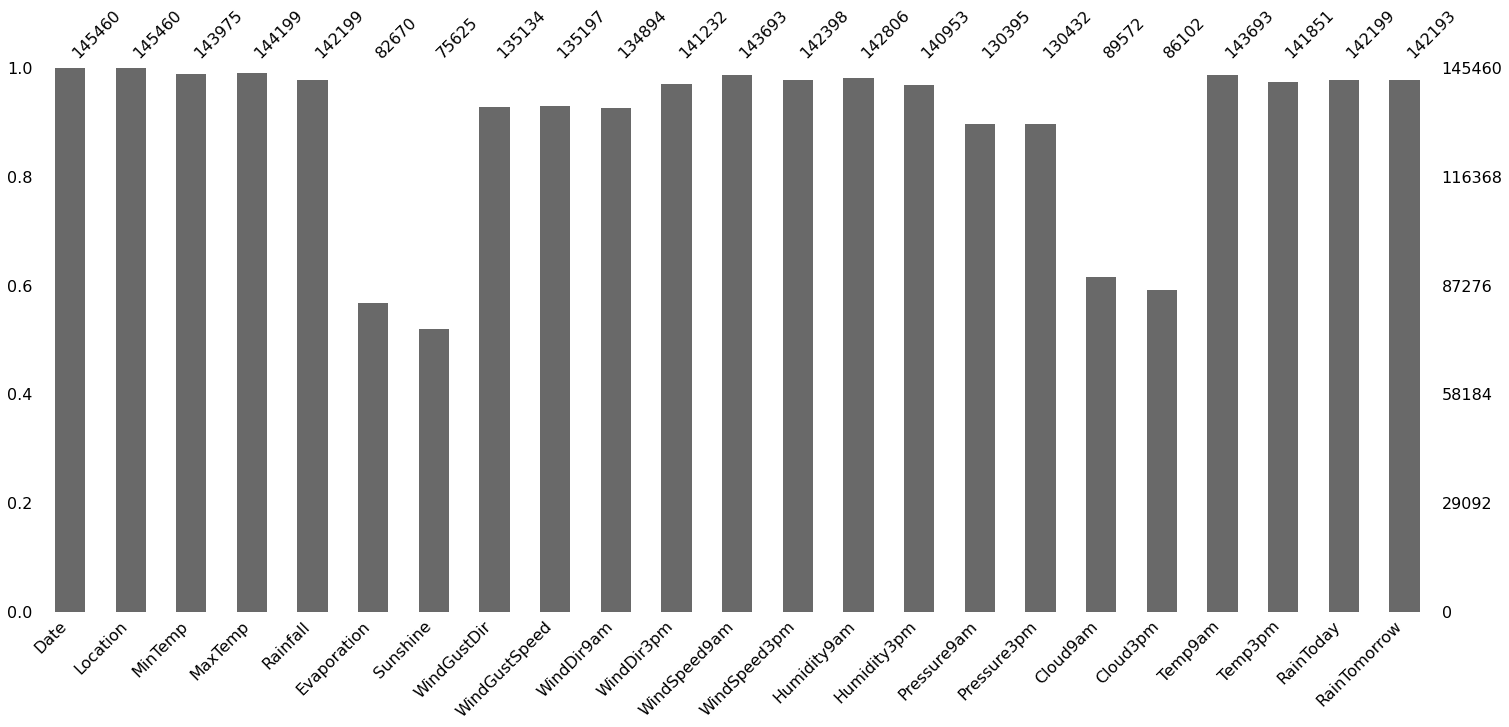

In [10]:
msno.bar(df)

Perbedaan tinggi pada diagram batang diatas terjadi karena terdapat perbedaan missing value antara tiap-tiap kolom, dimana semakin pendek diagram batang suatu kolom maka semakin banyak jumlah *missing value* pada kolom tersebut.

Kita akan menggunakan teknik  **Moving Average** untuk mengatasi *missing values* pada setiap kolom numerik. **Moving Average** atau yang juga dikenal sebagai **rolling average** dihitung dengan menggunakan rata-rata data deret waktu dalam k periode waktu. Teknik ini digunakan karena dataset berisikan data deret waktu, serta berdasarkan waktu dan tempat juga diduga memiliki perbedaan nilai kondisi cuaca tertentu. Misal nilai <b>Humidity9am</b> atau humiditas jam 9 pagi dalam persen pada Maret 2010 dan Oktober 2011 di Sydney dan Adelaide berbeda. Berdasarkan asumsi ini, tidak tepat jika *missing values* hanya diisi dengan satu nilai, maka dari itu akan digunakan teknik MA untuk mengisi kolom yang mengandung *missing values*.

In [11]:
# Memisahkan kolom kategorik dan numerik
categorical = [cols for cols in df.columns if df[cols].dtypes=='object']
numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

In [12]:
# Mengisi missing values setiap kolom dengan moving average (rolling)
for cols in numerical:
    if df[cols].isnull().sum() != 0:
        while True:
            df[cols] = df[cols].fillna(df[cols].rolling(min_periods = 1, window = 7, center=True).mean())
            if df[cols].isnull().sum() == 0:
                    break

In [13]:
# Memeriksa kembali apakah masih terdapat missing values
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,0,0.000000
MaxTemp,0,0.000000
Rainfall,0,0.000000
Evaporation,0,0.000000
Sunshine,0,0.000000
WindGustDir,10326,7.098859
WindGustSpeed,0,0.000000
WindDir9am,10566,7.263853


Untuk *missing values* pada kolom kategorik yang mengandung <10% *missing values* seperti WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow kita drop atau hilangkan dari dataset karena dimana ini tidak memberi pengaruh yang signifikan terhadap analisis data.

In [14]:
# Menghilangkan missing values pada kolom kategorik lain karena mengandung <10% missing values
df.dropna(subset=['RainToday','RainTomorrow','WindGustDir','WindDir9am','WindDir3pm'], axis=0, inplace=True)

In [15]:
# Memeriksa kembali apakah masih terdapat missing values
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0


Setelah mengatasi *Missing values* yang kita lakukan selanjutnya adalah *DATA ENCODING* atau mengubah tipe data object dan kategori (Yes dan No) menjadi tipe data numerik (1 sebagai "Yes" dan 0 sebagai "No") dan format kolom <b>Date</b> akan diubah menjadi format datetime dan akan dibuat kolom bulan dan tahun.

In [16]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [17]:
# Mengubah format kolom Date menjadi datetime
df["Date"] = pd.to_datetime(df["Date"]) # to_datetime converts to type date
# Membuat kolom baru 
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

In [18]:
# Memeriksa kembali ringkasan dataset (tipe masing-masing kolom pada data dan jumlah baris/kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           123710 non-null  datetime64[ns]
 1   Location       123710 non-null  object        
 2   MinTemp        123710 non-null  float64       
 3   MaxTemp        123710 non-null  float64       
 4   Rainfall       123710 non-null  float64       
 5   Evaporation    123710 non-null  float64       
 6   Sunshine       123710 non-null  float64       
 7   WindGustDir    123710 non-null  object        
 8   WindGustSpeed  123710 non-null  float64       
 9   WindDir9am     123710 non-null  object        
 10  WindDir3pm     123710 non-null  object        
 11  WindSpeed9am   123710 non-null  float64       
 12  WindSpeed3pm   123710 non-null  float64       
 13  Humidity9am    123710 non-null  float64       
 14  Humidity3pm    123710 non-null  float64       
 15  

Setelah dilakukannya *data cleaning*, jumlah observasi yang tersisa pada data adalah 123710 baris dan 23 kolom.

# Eksplorasi Data

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

In [19]:
pd.set_option("display.max_columns", 26)

In [20]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,2.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.500000,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.500000,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.333333,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7,0,0,2008,12,5


In [21]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
145454,2017-06-20,Uluru,3.5,21.8,0.0,10.0,10.7,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.666667,7.0,9.4,20.9,0,0,2017,6,20
145455,2017-06-21,Uluru,2.8,23.4,0.0,10.0,10.7,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,3.000000,4.5,10.1,22.4,0,0,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,10.0,10.7,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.500000,5.0,10.9,24.5,0,0,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,10.0,10.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.500000,5.0,12.5,26.1,0,0,2017,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,10.0,10.7,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.0,15.1,26.0,0,0,2017,6,24


## Frekuensi nilai pada kolom *RainTomorrow*

In [22]:
df['RainTomorrow'].value_counts()

0    96318
1    27392
Name: RainTomorrow, dtype: int64

<AxesSubplot:ylabel='RainTomorrow'>

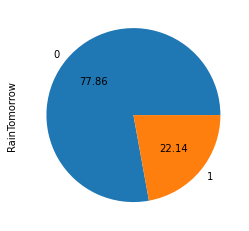

In [23]:
df['RainTomorrow'].value_counts().plot.pie(autopct='%.2f')

Berdasarkan frekuensi output diatas dapat kita ketahui bahwa terdapat <b>*imbalanced dataset*</b> karena perbedaan kelas yang cukup jauh yaitu kelas 1 (Yes) sebesar 77.86% dan kelas 0 (No) sebesar 22.14%. Berdasarkan pie chart diatas juga dapat kita ketahui bahwa jumlah hari yang urun hujan jauh lebih sedikit dibanding jumlah hari yang tidak turun hujan pada dataset yang kita punya.

## Statistik deskriptif dan distribusi masing-masing kolom numerik

<b> Untuk mendapatkan ringkasan statistik deskriptif untuk kolom yang berisi tipe data numerik saja seperti count,mean,std,min,max dll pada df: </b>

In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.416221,23.477178,2.375661,6.628942,7.933348,40.685280,15.011689,19.174578,67.659055,50.766630,1017.229620,1014.861545,4.588274,4.573165,17.249601,21.930129,0.224363,0.221421,2012.806111,6.431824,15.709781
std,6.369379,7.208264,8.528039,6.305315,3.770014,13.388636,8.307285,8.571039,19.165018,20.980978,7.068359,7.019367,2.788990,2.634515,6.501097,7.041993,0.417164,0.415205,2.528473,3.475113,8.788908
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.800000,18.100000,0.000000,2.800000,5.400000,31.000000,9.000000,13.000000,56.000000,35.000000,1012.600000,1010.100000,2.000000,2.000000,12.500000,16.700000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,12.200000,23.000000,0.000000,5.400000,8.400000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.100000,1014.800000,5.000000,5.000000,16.900000,21.500000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,17.100000,28.600000,0.800000,8.400000,11.200000,48.000000,20.000000,24.000000,82.000000,65.000000,1021.900000,1019.600000,7.000000,7.000000,21.900000,26.900000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000


## Memeriksa distribusi data menggunakan Histogram

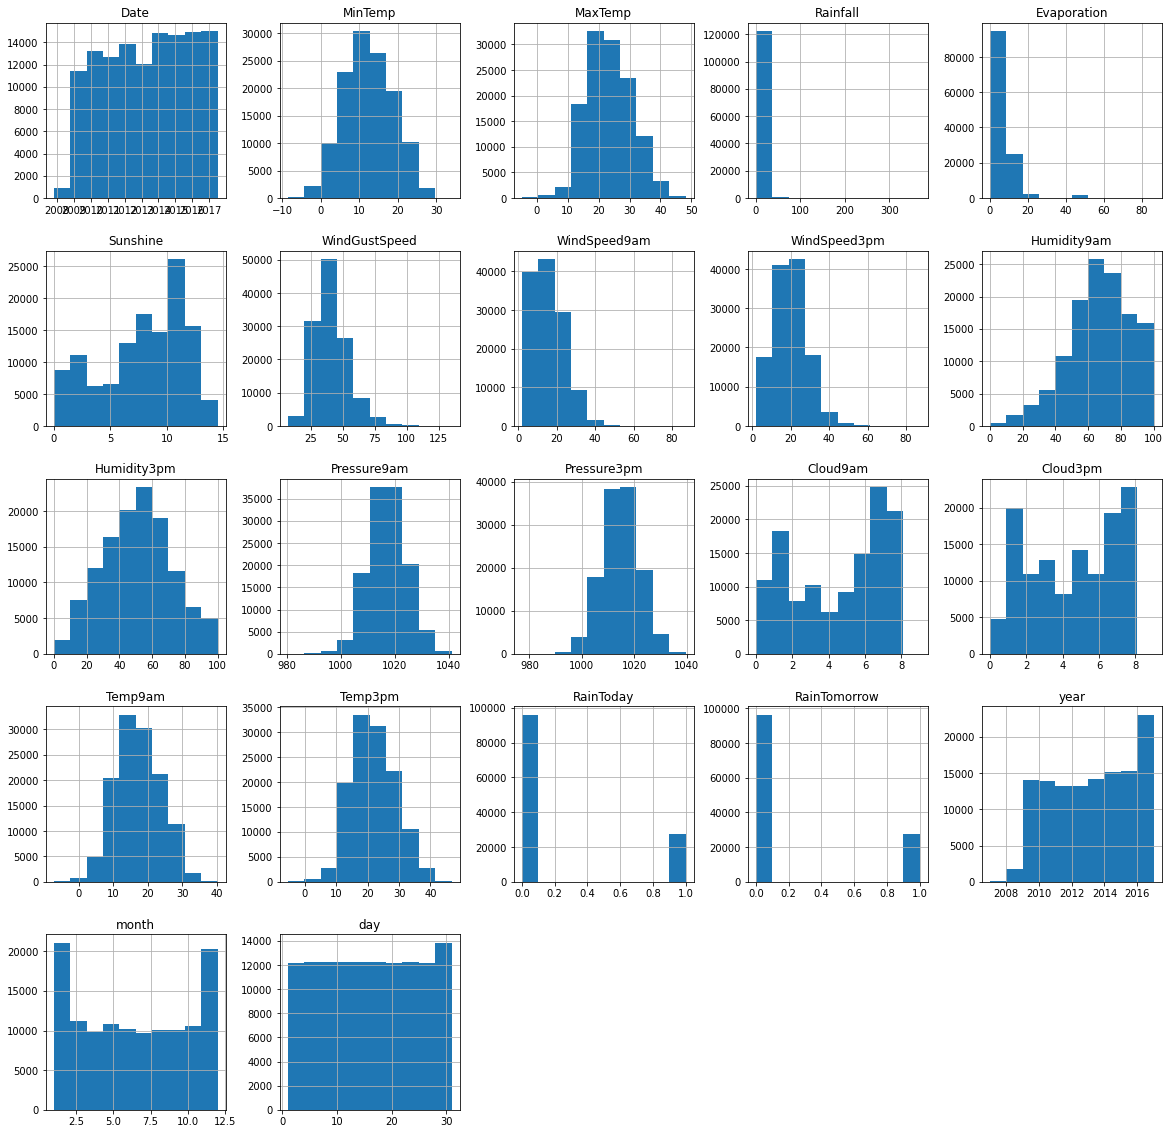

In [25]:
df.hist(figsize=(20, 20))
plt.show()

Berdasarkan Histogram diatas dapat kita sumpulkan bahwa:
1. Kolom <b>MinTemp</b> dan <b>MaxTemp</b> memiliki distribusi yang cenderung mirip.
2. Kolom <b>Rainfall</b> dan <b>Evaporation</b> memiliki *outlier*. Jika dilihat dari nilai mediannya dan rata-ratanya, kedua kolom ini memiliki nilai median dan rata-rata tidak lebih dari 10 mm. Artinya, rata-rata jumlah curah hujan dan jumlah evaporasi di Australia selama 10 tahun berkisar pada nilai 10 mm.
3. Kolom <b>WindGustSpeed</b>, <b>WindGust9am</b>, dan <b>WindGust3pm</b> memiliki distribusi yang cendrung mirip, namun jika dilihat dari frekuensinya, kolom <b>WindGust3pm</b> memiliki nilai rata-rata lebih besar dibanding dengan kolom <b>WindGust9am</b>, sehingga dapat disimpulkan bahwa kecepatan angin pada waktu sore cenderung lebih tinggi.
4. Kolom <b>Humidity9am</b> dan <b>Humidity3pm</b> juga memiliki distribusi yang cenderung mirip, namun kolom <b>Humidity9am</b> memiliki nilai rata-rata lebih besar dibanding <b>Humidity3pm</b>, sehingga dapat kita simpulkan bahwa persentase humiditas pada waktu pagi lebih tinggi dibanding dengan waktu sore.
5. Kolom <b>Pressure9am</b> dan <b>Pressure3pm</b> memiliki distribusi cenderung mirip, dan nilai rata-rata serta median yang tidak berbeda jauh. Sehingga, dapat disimpulkan bahwa tekanan udara pada saat pagi maupun sore tidak terjadi perubahan yang signifikan.
6. Kolom <b>Cloud9a</b> dengan <b>Cloud3pm</b> serta kolom <b>Temp9am</b> dan <b>Temp3pm</b> memiliki distribusi yang cenderung mirip. Sehingga dapat disimpulkan bahwa persentase langit yang tertutup awan pada waktu pagi dan sore tidak mengalami perubahan yang signifikan. namun untuk temperatur, berdasarkan nilai rata-ratanya temperatur pada sore hari cenderung lebih tinggi dibanding pada pagi hari.

## Distribusi lokasi berdasarkan terjadinya hujan atau tidak

Berdasarkan visualisasi ini, dapat diketahui apakah perbedaan lokasi atau daerah mempengaruhi turunnya hujan atau tidak.

In [26]:
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,635
Albury,558
AliceSprings,231
BadgerysCreek,524
Ballarat,750


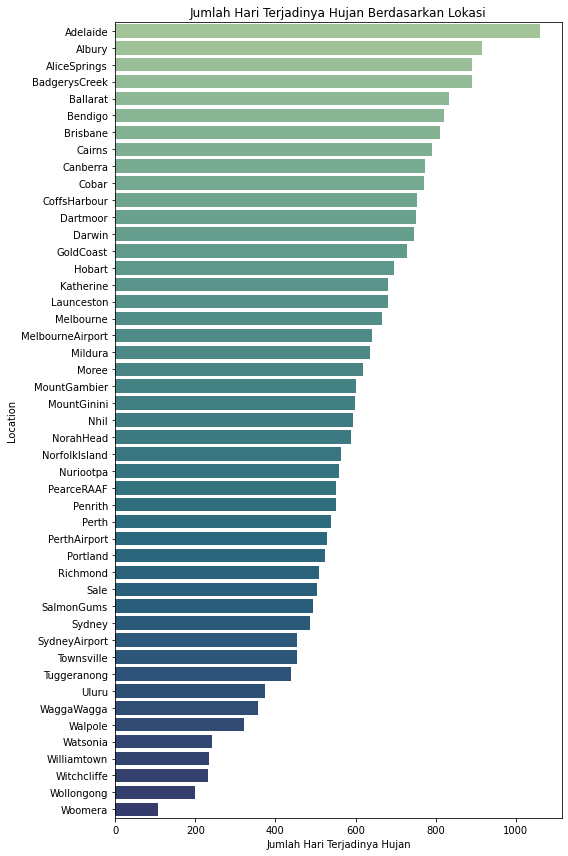

In [27]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Jumlah Hari Terjadinya Hujan')
plt.title('Jumlah Hari Terjadinya Hujan Berdasarkan Lokasi')
plt.tight_layout()

Berdasarkan plot diatas diketahui bahwa pada lokasi yang berbeda menunjukkan jumlah hari turunnya hujan yang berbeda pula, sehingga dapat kita asumsikan bahwa lokasi mempengaruhi prediksi turunnya hujan.

## Pola turunnya hujan berdasarkan waktu turunnya hujan perbulan

Dengan visualisasi ini dapat kita ketahui apakah bulan mempengaruhi hujan, atau apakah turunnya hujan di Australia terjadi secara musiman.

In [28]:
df_seasonality = df.copy()
df_seasonality.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,2.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.500000,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.500000,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.333333,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7,0,0,2008,12,5


In [29]:
df_seasonality_grouped = df_seasonality.groupby('month').sum()
df_seasonality_grouped = df_seasonality_grouped[['RainToday']]

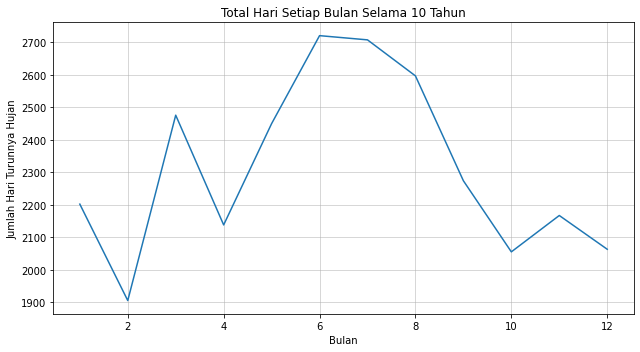

In [30]:
plt.figure(figsize=(9,5))
sns.lineplot(data=df_seasonality_grouped, x=df_seasonality_grouped.index, y='RainToday')
plt.title('Total Hari Setiap Bulan Selama 10 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Hari Turunnya Hujan')
plt.grid(linewidth=0.5)
plt.tight_layout()

Berdasarkan hasil plot dapat kita simpulkan bahwa secara grafik, turunnya hujan terjadi secara musiman. Intensitas turun hujan tertinggi terjadi pada bulan 6 (Juni) dan cenderung menurun di bulan 8 (Agustus) sampai ke bulan 10 (Oktober). Intensitas hujan terendah terdapat pada bulan 2 (Februari). Sehingga berdasarkah plot diatas dapat kita simpulkan bahwa bulan mempengaruhi turunnya hujan.

<b> Namun karena month merupakan data berbentuk timestamp dimana tidak bisa digunakan untuk perhitungan dalam statistik atau perhitungan matematika.

In [31]:
df.drop(['month'], axis=1, inplace=True)

## Intensitas turunnya hujan berdasarkan arah mata angin

Dilakukan eksplorasi untuk melihat apakah kolom `WindGustDir`, `WindDir9am`, dan `WindDir3pm` berpengaruh terhadap `RainTomorrow`.

In [32]:
df_categorical = df[['RainTomorrow','WindGustDir','WindDir9am','WindDir3pm']]
df_categorical = df_categorical[df_categorical['RainTomorrow']==1]
df_categorical.head()

,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm
8,1,NNW,SE,NW
10,1,N,SSE,ESE
11,1,NNE,NE,ENE
12,1,W,NNW,NNW
16,1,ENE,SSW,E


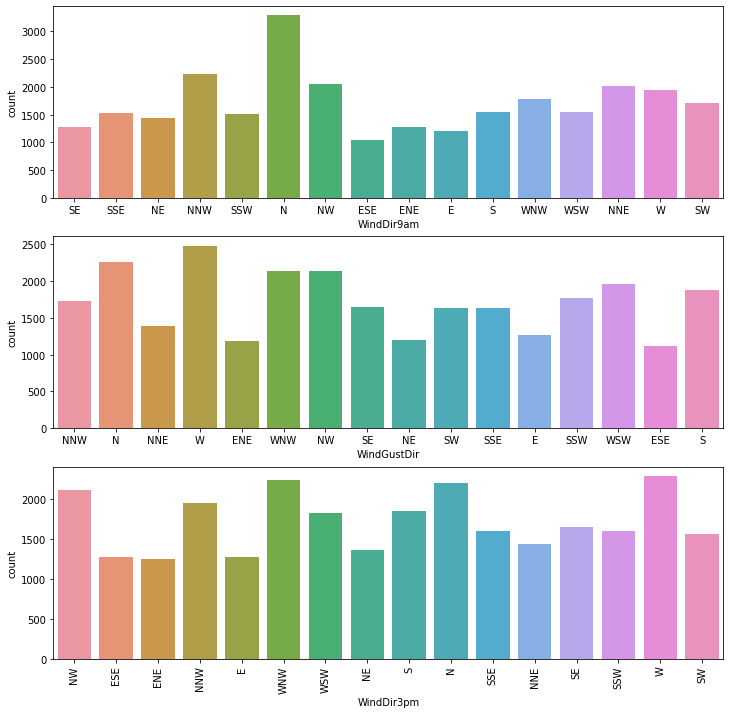

In [33]:
categoricalPlot = ['WindDir9am','WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(3, 1, figsize=(12,12))
c=0
while c<=2:
    sns.countplot(df_categorical[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.show()

Dari plot diatas dapa kita simpulkan bahwa secara grafis ketiga kolom arah angin tidak berpengaruh secara signifikan terhadap intensitas turunnya hujan. Hal ini ditunjukkan dengan beberapa arah mata angin yang memiliki intensitas atau jumlah hari turunnya hujan dengan jumlah yang sama.

## Korelasi kolom numerik dengan kolom target

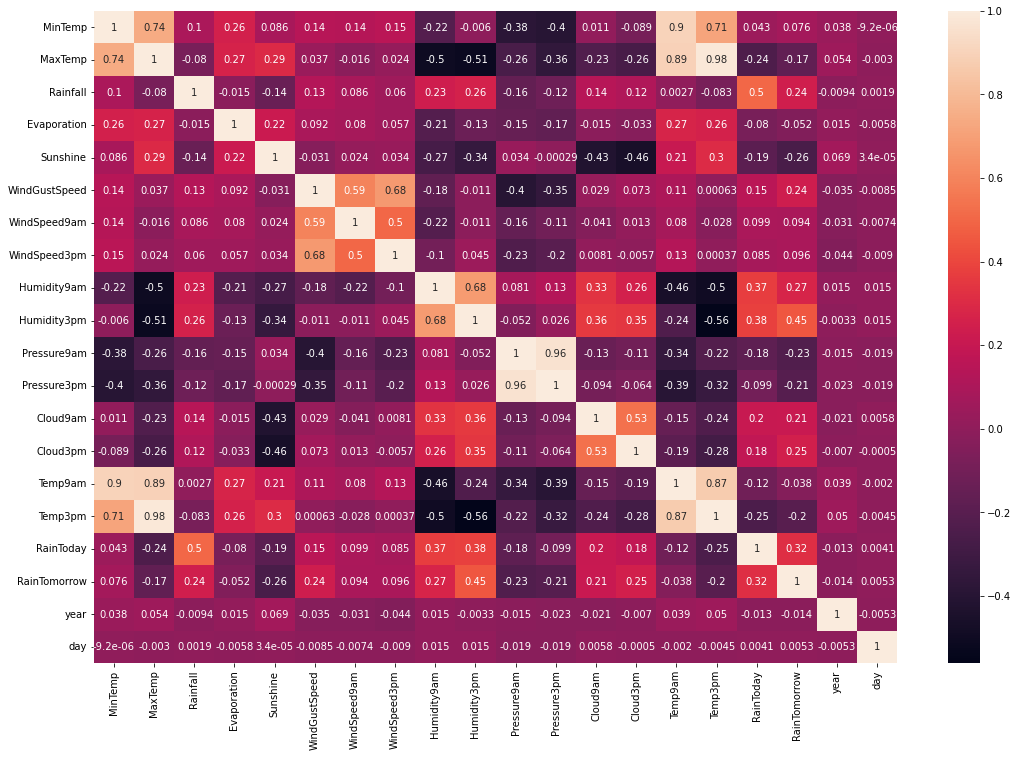

In [34]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Dari plot heatmap diatas dapat kita ketahui bahwa kolom <b>Humidity3pm</b> dan <b>RainToday</b> terhadap <b>RainTomorrow</b> memiliki nilai koefisien korelasi paling tinggi. Hal ini mendukung asumsi sebelumnya bahwa semakin tinggi humiditas, maka semakin tinggi juga kemungkinan untuk hujan di esok hari, serta hujan di hari kemarin juga membawa kemungkinan untuk hujan di esok hari.

# Data Preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pelatihan model prediksi klasifikasi.

## Menghilangkan kolom numerik yang memiliki nilai koefisien korelasi rendah terhadap kolom target

Dari plot heatmap diatas kita ketahui bahwa kolom-kolom yang memiliki nilai koefisien korelasi rendah terhadap kolom target atau <b>RainTomorrow</b> adalah <b>MinTemp</b>, <b>Evaporation</b>, <b>WindSpeed9am</b>, <b>WindSpeed3pm</b>, dan <b>Temp9am</b>.

In [35]:
df.drop(['MinTemp','Evaporation','WindSpeed9am','WindSpeed3pm','Temp9am'], axis=1, inplace=True)

## Menghilangkan kolom kategorik yang diduga tidak berpengaruh signifikan terhadap kolom target

Dari hasil analisis eksplorasi pada data sebelumnnya, diasumsikan bahwa tiga kolom kategorik yaitu <b>WindGustDir</b>, <b>WindDir9am</b>, dan <b>WindDir3pm</b> tidak memiliki pengaruh yang signifikan, sehingga untuk mendukung asumsi ini perlu kita buat plot *heatmap* untuk melihat bagaimana koefisien korelasi antara ketiga kolom kategorik ini dengan kolom <b>RainTomorrow</b>

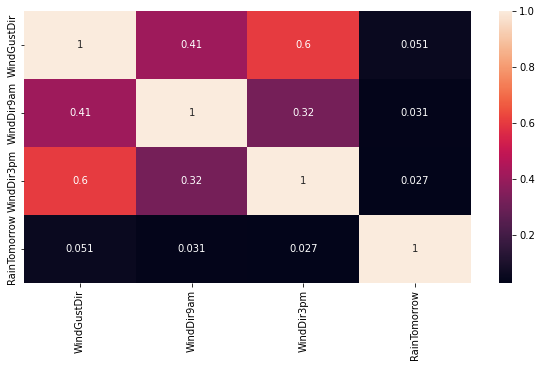

In [36]:
# Mengubah kolom kategorik menjadi kolom numerik
dff = df.copy()
cat = ['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']
le =  LabelEncoder()
for i in cat:
        dff[i] = le.fit_transform(dff[i])

dff = dff[['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]

plt.figure(figsize=(10,5))
sns.heatmap(dff.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Berdasarkan plot diatas kita ketahui bahwa koefisien korelasi antara ketiga variabel dengan kolom <b>RainTomorrow</b> sehingga tidak terdapat korelasi antara ketiga variabel tersebut dengan kolom <b>RainTomorrow</b>. Maka ketiga variabel/kolom tersebut akan didrop atau dihilangkan dari dataset.

In [37]:
df.drop(['WindGustDir','WindDir9am','WindDir3pm'], axis=1, inplace=True)

## Menghilangkan kolom yang memiliki nilai koefisien korelasi tinggi satu sama lain (multikolinearitas)

Asumsi multikolinearitas cukup menjadi perhatian dalam prediksi ini, karena adanya multikolinearitas akan berdampak pada perubahan pada satu variabel dapat menyebabkan perubahan besar pada nilai koefisien regresi parsial variabel lainnya. Multikolinearitsa sendiri menunjukkan adanya hubungan linear antara variabel bebas dalam model regresi berganda.

*https://www.statistikian.com/*

pada plot heatmap sebelumnya, dapat kita lihat bahwa antara kolom <b>MaxTemp</b> dengan <b>Temp3pm</b>, dan juga antara  kolom <b>Pressure9am</b> dengan <b>Pressure3pm</b> memiliki korelasi yang sangat tinggi yaitu 0.98 dan 0.96. Maka dari itu salah satu dari kedua kolom akan didrop atau dihilangkan untuk mencegah multikolinearitas.

In [38]:
df.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

In [39]:
# Drop kolom date, year, day karena tidak dibutuhkan
df.drop(['Date','year','day'], axis=1, inplace=True)

In [40]:
# Memeriksa kembali ringkasan dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MaxTemp        123710 non-null  float64
 2   Rainfall       123710 non-null  float64
 3   Sunshine       123710 non-null  float64
 4   WindGustSpeed  123710 non-null  float64
 5   Humidity9am    123710 non-null  float64
 6   Humidity3pm    123710 non-null  float64
 7   Pressure9am    123710 non-null  float64
 8   Cloud9am       123710 non-null  float64
 9   Cloud3pm       123710 non-null  float64
 10  RainToday      123710 non-null  int64  
 11  RainTomorrow   123710 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 12.3+ MB


In [41]:
# Reset index setelah dilakukan dropping dengan tujuan agar index berurutan
df.reset_index(drop=True, inplace=True)

## Standarisasi data

Standardisasi merupakan proses mengubah data sedemikian rupa sehingga mean tiap variabel menjadi sama dengan nol, dan standard deviation tiap variabel adalah satu. Hal ini diberlakukan agar skala pada semua variabel sama dan juga karena terdapat *outlier* pada data.

<b> Rumus mencari standarisasi data: (value dalam kolom tertentu - mean dalam kolom tertentu) / standar deviasi dalam kolom tertentu

In [42]:
columns = ['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow','Location']

In [43]:
data = df[columns]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud9am       123710 non-null  float64
 8   Cloud3pm       123710 non-null  float64
 9   RainToday      123710 non-null  int64  
 10  RainTomorrow   123710 non-null  int64  
 11  Location       123710 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 11.3+ MB


<b> Untuk mendapatkan ringkasan statistik deskriptif untuk kolom yang berisi tipe data numerik saja seperti count,mean,std,min,max dll pada data: </b>

In [44]:
data.describe()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,23.477178,2.375661,7.933348,40.685280,67.659055,50.766630,1017.229620,4.588274,4.573165,0.224363,0.221421
std,7.208264,8.528039,3.770014,13.388636,19.165018,20.980978,7.068359,2.788990,2.634515,0.417164,0.415205
min,-4.800000,0.000000,0.000000,7.000000,0.000000,0.000000,980.500000,0.000000,0.000000,0.000000,0.000000
25%,18.100000,0.000000,5.400000,31.000000,56.000000,35.000000,1012.600000,2.000000,2.000000,0.000000,0.000000
50%,23.000000,0.000000,8.400000,39.000000,69.000000,51.000000,1017.100000,5.000000,5.000000,0.000000,0.000000
75%,28.600000,0.800000,11.200000,48.000000,82.000000,65.000000,1021.900000,7.000000,7.000000,0.000000,0.000000
max,48.100000,367.600000,14.500000,135.000000,100.000000,100.000000,1041.000000,9.000000,9.000000,1.000000,1.000000


In [45]:
# Melihat 5 data teratas
data.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Location
0,22.9,0.6,12.3,44.0,71.0,22.0,1007.7,8.000000,2.0,0,0,Albury
1,25.1,0.0,12.3,44.0,44.0,25.0,1010.6,7.500000,5.0,0,0,Albury
2,25.7,0.0,12.3,46.0,38.0,30.0,1007.6,7.500000,2.0,0,0,Albury
3,28.0,0.0,12.3,24.0,45.0,16.0,1017.6,5.333333,5.0,0,0,Albury
4,32.3,1.0,12.3,41.0,82.0,33.0,1010.8,7.000000,8.0,0,0,Albury


In [46]:
scaler = StandardScaler()
scaler.fit(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
scaled_features = scaler.transform(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-3])
df_feat.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
0,-0.080072,-0.208215,1.158263,0.247578,0.174326,-1.371087,-1.348214,1.223289,-0.976717
1,0.225134,-0.278572,1.158263,0.247578,-1.234497,-1.228100,-0.937933,1.044012,0.162017
2,0.308373,-0.278572,1.158263,0.396959,-1.547568,-0.989788,-1.362361,1.044012,-0.976717
3,0.627452,-0.278572,1.158263,-1.246232,-1.182318,-1.657062,0.052400,0.267144,0.162017
4,1.223992,-0.161311,1.158263,0.023507,0.748291,-0.846800,-0.909638,0.864734,1.300751


In [47]:
# Melihat 5 data terakhir
df_feat.tail()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
123705,-0.232675,-0.278572,0.73386,-0.723399,-0.451817,-1.132775,1.056880,0.028108,0.921173
123706,-0.010707,-0.278572,0.73386,-0.723399,-0.869246,-1.275762,1.042733,-0.569483,-0.027772
123707,0.252880,-0.278572,0.73386,-1.395613,-0.608353,-1.418749,0.887109,0.326903,0.162017
123708,0.474849,-0.278572,0.73386,-0.275255,-0.764889,-1.275762,0.533419,0.326903,0.162017
123709,0.488722,-0.278572,0.73386,-0.947470,-0.869246,-1.275762,0.307057,-0.569483,-0.976717


<b> Untuk mendapatkan ringkasan statistik deskriptif untuk kolom yang berisi tipe data numerik saja seperti count,mean,std,min,max dll pada df_feat: </b>

In [48]:
df_feat.describe()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
count,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05,1.237100e+05
mean,2.339048e-15,1.149436e-14,-6.960706e-16,3.562666e-16,1.035592e-14,1.401578e-14,3.449749e-15,9.418570e-14,-1.599807e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.922899e+00,-2.785717e-01,-2.104337e+00,-2.515971e+00,-3.530356e+00,-2.419660e+00,-5.196364e+00,-1.645145e+00,-1.735873e+00
25%,-7.459771e-01,-2.785717e-01,-6.719759e-01,-7.233985e-01,-6.083533e-01,-7.514757e-01,-6.549807e-01,-9.280367e-01,-9.767167e-01
50%,-6.619902e-02,-2.785717e-01,1.237803e-01,-1.258744e-01,6.996863e-02,1.112296e-02,-1.833813e-02,1.476259e-01,1.620174e-01
75%,7.106902e-01,-1.847631e-01,8.664861e-01,5.463402e-01,7.482906e-01,6.783968e-01,6.607473e-01,8.647344e-01,9.211734e-01
max,3.415929e+00,4.282647e+01,1.741818e+00,7.044415e+00,1.687506e+00,2.346581e+00,3.362941e+00,1.581843e+00,1.680329e+00


In [49]:
# Menambahkan kolom Location dan RainToday
df_feat['Location'] = data['Location']
df_feat['RainToday'] = data['RainToday']

df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud9am       123710 non-null  float64
 8   Cloud3pm       123710 non-null  float64
 9   Location       123710 non-null  object 
 10  RainToday      123710 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 10.4+ MB


## Encoder untuk kolom `Location`

In [50]:
df_dummies = pd.get_dummies(df_feat, columns=['Location'])
df_dummies.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Location_Adelaide,Location_Albury,Location_AliceSprings,...,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,-0.080072,-0.208215,1.158263,0.247578,0.174326,-1.371087,-1.348214,1.223289,-0.976717,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.225134,-0.278572,1.158263,0.247578,-1.234497,-1.228100,-0.937933,1.044012,0.162017,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.308373,-0.278572,1.158263,0.396959,-1.547568,-0.989788,-1.362361,1.044012,-0.976717,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.627452,-0.278572,1.158263,-1.246232,-1.182318,-1.657062,0.052400,0.267144,0.162017,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.223992,-0.161311,1.158263,0.023507,0.748291,-0.846800,-0.909638,0.864734,1.300751,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df_final = df_dummies.copy()

## Splitting dataset

Membagi data training dan testing dengan rasio 70:30

In [52]:
X = df_final
y = df.RainTomorrow

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
print("Training set sebesar {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("Test set sebesar {0:0.2f}%".format(len(X_test)/len(df.index)*100))

Training set sebesar 70.00%
Test set sebesar 30.00%


In [55]:
print('Jumlah training set:', len(X_train))
print('Jumlah testing set:', len(X_test))

Jumlah training set: 86597
Jumlah testing set: 37113


In [56]:
print("Jumlah hari turunnya hujan: {0} ({1:2.2f}%)".format(len(df.loc[df["RainTomorrow"] == 1]), (len(df.loc[df["RainTomorrow"]==1])/len(df.index))*100.0))
print("Jumlah hari turunnya hujan : {0} ({1:2.2f}%)\n".format(len(df.loc[df["RainTomorrow"] == 0]), (len(df.loc[df["RainTomorrow"] == 0])/len(df.index))*100.0))

print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False: {0} ({1:2.2f}%)\n".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)*100.0)))

print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

Jumlah hari turunnya hujan: 27392 (22.14%)
Jumlah hari turunnya hujan : 96318 (77.86%)

Training True: 19095 (22.05%)
Training False: 67502 (77.95%)

Testing True: 8297 (22.36%)
Testing False: 28816 (77.64%)


# Pendefinisian Model

## Logistic Regression

In [57]:
logreg = LogisticRegression(C=0.7, class_weight='balanced', solver='liblinear', random_state=0)

## SVM

In [58]:
from sklearn.svm import SVC

In [59]:
svm = svm.SVC(class_weight='balanced', kernel='linear')

# Pelatihan Model

## Logistic Regression

In [60]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.7, class_weight='balanced', random_state=0,
                   solver='liblinear')

In [61]:
y_pred_lr = logreg.predict(X_test)

## SVM

In [62]:
svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [63]:
y_pred_svm = svm.predict(X_test)

# Evaluasi Model

Pada evaluasi model ini, dengan mengguanakan *evaluation metrics* yang tepat juga dapat membantu kita dalam mengatasi *imbalanced data* (data yang tidak seimbang) yang ada

## Logistic Regression

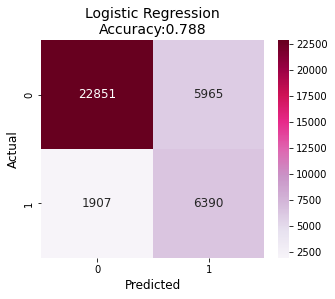

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     28816
           1       0.52      0.77      0.62      8297

    accuracy                           0.79     37113
   macro avg       0.72      0.78      0.74     37113
weighted avg       0.83      0.79      0.80     37113

Accuracy Score: 0.7878910354862178
Precision Score: 0.5171995143666531
Recall Score: 0.7701578883933952
F1 Score: 0.6188262638001161


In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score: {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score: {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

## SVM

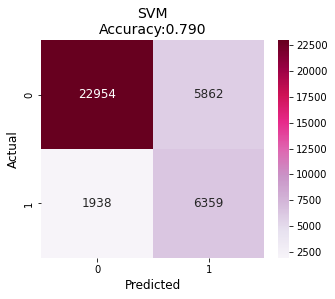

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85     28816
           1       0.52      0.77      0.62      8297

    accuracy                           0.79     37113
   macro avg       0.72      0.78      0.74     37113
weighted avg       0.83      0.79      0.80     37113

Accuracy Score: 0.7898310565031121
Precision Score: 0.5203338515669749
Recall Score: 0.7664215981680126
F1 Score: 0.6198459888878058


In [65]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))

Berdasarkan hasil diatas dapat kita ketahui bahwa nial F1 score pada SVM lebih besar daripada F1 Score pada regresi logistik, sehingga SVM memiliki performa prediksi yang lebih baik dibanding Regresi Logistik, walaupun keduanya memiliki niali akurasi yang hampir sama. SVM memiliki nilai akurasi sebesar 0.79, precision score sebesar 0.52, recall Score sebesar 0.77 dan F1 Score sebesar 0.62. 

# Feature Selection

Setelah mendapatkan model prediksi klasifikasi terbaik, akan dicek *feature selection* dari data, yaitu mengetahui fitur/kolom mana saja yang paling berpengaruh untuk menentukan prediksi target.

Sebelum mengecek *feature selection* dari model, akan dilihat koefisien regresi logistik dan juga intersep dari model yang didapat.

In [66]:
print('Nilai Intersep model:', logreg.intercept_)
print('')
print('Nilai koefisien model regresi logistik:', logreg.coef_)

Nilai Intersep model: [-0.66611235]

Nilai koefisien model regresi logistik: [[ 0.21290498  0.07985993 -0.43152577  0.63341459  0.12092055  1.2434113
  -0.33806651 -0.00622587  0.225076    0.32013614  0.74587737  0.94032466
   0.19271803  0.53732486  0.05638253  0.65714452  0.50977277 -0.17135783
  -0.23425515  0.37225996 -0.11001675  0.02816812 -0.27701987 -0.0670166
  -0.35772335  0.33491496 -0.02121281 -0.18734221 -0.47436923  0.0343756
   0.16736274 -0.05402364 -1.41656815 -0.34641457  0.29127692 -0.30495944
   0.02189347 -0.012059    0.17670191  0.53647197  0.29610515 -0.19061898
  -0.87415589 -0.50546226  0.73893326  0.03402431 -0.17122456 -0.93897573
  -0.41365964  0.48783721  0.35095952 -0.19144422 -0.040429    0.04323701
   0.42867779 -0.92649528 -0.3620528 ]]


In [67]:
# Memeriksa feature selection

feature_selection=pd.DataFrame({'feature':list(df_final.columns),'feature_selection':[abs(i) for i in logreg.coef_[0]]})
feature_selection

,feature,feature_selection
0,MaxTemp,0.212905
1,Rainfall,0.079860
2,Sunshine,0.431526
3,WindGustSpeed,0.633415
4,Humidity9am,0.120921
5,Humidity3pm,1.243411
6,Pressure9am,0.338067
7,Cloud9am,0.006226
8,Cloud3pm,0.225076
9,RainToday,0.320136


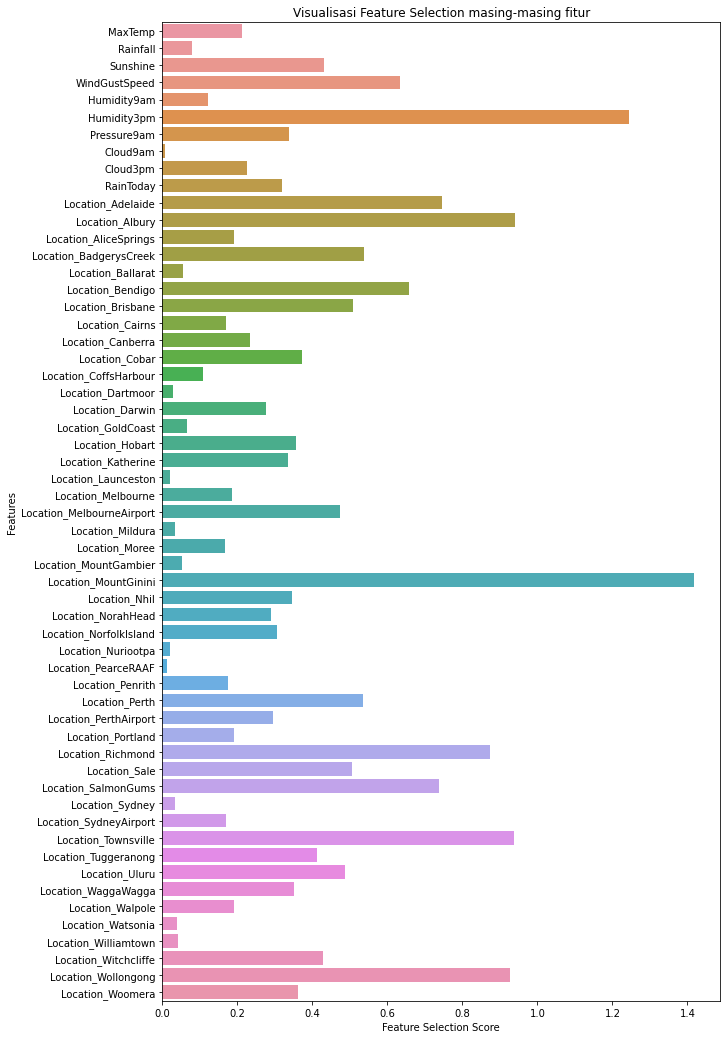

In [68]:
plt.figure(figsize=(10, 18))
sns.barplot(x=feature_selection['feature_selection'], y=feature_selection['feature'])
plt.xlabel("Feature Selection Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Selection masing-masing fitur")

plt.show()

Berdasarkan plot diatas dapat kita ketahui bahwa skor *feature importance* dari  kolom <b>Cloud9am</b> memiliki skor yang paling kecil, sehingga kolom tersebut akan kita drop atau hilangkan dan kemudian akan dibuat model *Logistic Regression yang baru*.

# Membangun model SVM baru

In [69]:
data2 = data.copy()
data2.drop('Cloud9am', axis=1, inplace=True)
feature_names = list(data2.columns.values)

data2.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,RainToday,RainTomorrow,Location
0,22.9,0.6,12.3,44.0,71.0,22.0,1007.7,2.0,0,0,Albury
1,25.1,0.0,12.3,44.0,44.0,25.0,1010.6,5.0,0,0,Albury
2,25.7,0.0,12.3,46.0,38.0,30.0,1007.6,2.0,0,0,Albury
3,28.0,0.0,12.3,24.0,45.0,16.0,1017.6,5.0,0,0,Albury
4,32.3,1.0,12.3,41.0,82.0,33.0,1010.8,8.0,0,0,Albury


In [70]:
scaler_ = StandardScaler()
scaler_.fit(data2.drop(['RainToday','RainTomorrow','Location'], axis=1))
scaled_features_ = scaler_.transform(data2.drop(['RainToday','RainTomorrow','Location'], axis=1))
df_feat_ = pd.DataFrame(scaled_features_,columns = data2.columns[:-3])
df_feat_.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm
0,-0.080072,-0.208215,1.158263,0.247578,0.174326,-1.371087,-1.348214,-0.976717
1,0.225134,-0.278572,1.158263,0.247578,-1.234497,-1.228100,-0.937933,0.162017
2,0.308373,-0.278572,1.158263,0.396959,-1.547568,-0.989788,-1.362361,-0.976717
3,0.627452,-0.278572,1.158263,-1.246232,-1.182318,-1.657062,0.052400,0.162017
4,1.223992,-0.161311,1.158263,0.023507,0.748291,-0.846800,-0.909638,1.300751


In [71]:
df_feat_['Location'] = data2['Location']
df_feat_['RainToday'] = data2['RainToday']

df_feat_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud3pm       123710 non-null  float64
 8   Location       123710 non-null  object 
 9   RainToday      123710 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 9.4+ MB


In [72]:
df_dummies_ = pd.get_dummies(df_feat_, columns=['Location'])
df_dummies_.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,RainToday,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,...,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,-0.080072,-0.208215,1.158263,0.247578,0.174326,-1.371087,-1.348214,-0.976717,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.225134,-0.278572,1.158263,0.247578,-1.234497,-1.228100,-0.937933,0.162017,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.308373,-0.278572,1.158263,0.396959,-1.547568,-0.989788,-1.362361,-0.976717,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.627452,-0.278572,1.158263,-1.246232,-1.182318,-1.657062,0.052400,0.162017,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.223992,-0.161311,1.158263,0.023507,0.748291,-0.846800,-0.909638,1.300751,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df_final_ = df_dummies_.copy()

In [74]:
X = df_final_
y = df.RainTomorrow

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [76]:
svm

SVC(class_weight='balanced', kernel='linear')

In [77]:
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test) 

## Memeriksa hasil predict
y_pred_svm

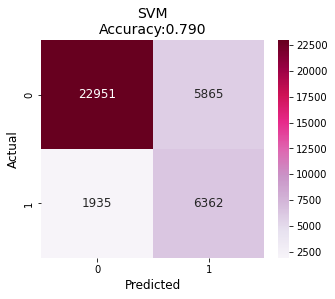

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85     28816
           1       0.52      0.77      0.62      8297

    accuracy                           0.79     37113
   macro avg       0.72      0.78      0.74     37113
weighted avg       0.83      0.79      0.80     37113

Accuracy Score: 0.7898310565031121
Precision Score: 0.5203238733949456
Recall Score: 0.7667831746414366
F1 Score: 0.6199571233677645


In [79]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))

Berdasarkan hasil pada output, dapat kita ketahui bahwa lagoritma terbaik adalah LogisticRegression dan setelah dilakukannya pengecekan *feature importance* yaitu kolom apa saja yang berpengaruh dan tidak berpengaruh dan menghilangkan kolom yang tidak berpengaruh, maka kita mendapatkan nilai akurasi akhir sebesar 79%, nilai precision sebesar 0.52, recall sebesar 0.77, dan f1-score sebesar 0.62. Dan juga dapat kita ketahui bahwa pengurangan jumlah kolom tidak berpengaruh terhadap performa klasifikasi secara signifikan.

# Model Inference

Model inference digunakan untuk menguji kekuratan model dan menguji model dengan data diluar data yang tersedia

Contoh 1:Pada suatu hari di kota Albury, Australia tercatat laporan kondisi cuaca pada hari itu yang tercantum sebagi berikut:

1. Temperatur maksimal: 22 derajat celcius.
2. Jumlah curah hujan: 0.6 mm
3. Jumlah jam hari itu cerah dengan cahaya matahari: 10 jam
4. Kecepatan angin: 54.0
5. Jumlah Humiditas pada pukul 9 pagi: 19.0%
6. Jumlah Humiditas pada pukul 3 sore: 45.0%
7. Tekanan Udara pada pukul 9 pagi: 1000.0 hpa
8. Persentase langit tertutup awan: 10%
10. Hari ini turun hujan

Pertanyaan:Jika hari ini turun hujan,apakah besok juga akan turun hujan bila ditinjau dari prediksi kondisi cuaca?

In [80]:
maxtemp = float(input("Max Temperature:"))
rainfall = float(input("Rainfall (in mm):"))
sunshine = float(input("Sunshine hour:"))
windspeed = float(input("Wind Speed:"))
humidity9 = float(input("Humidity percentation at 9 AM:"))
humidity3 = float(input("Humidity percentation at 3 PM:"))
pressure = float(input("Pressure at 9 AM:"))
cloud = float(input("Cloud persentation at 3 PM:"))
raintoday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))
location = input('Your Location:')

val = [maxtemp, rainfall, sunshine, windspeed, humidity9, humidity3, pressure, cloud]
val = scaler_.transform([val])
val = val.reshape(8,)

if raintoday == 1:
    val = np.append(val, 1)
elif raintoday == 0:
    val = np.append(val, 0)
else:
    print('ERROR!')

locations = {"Adelaide":0,"Albury":1,"AliceSprings":2,
            "Badgerys Creek":3,"Ballarat":4,"Bendigo":5,
            "Brisbane":6,"Cairns":7,"Canberra":8,
            "Cobar":9,"Coffs Harbour":10,"Dartmoor":11,
            "Darwin":12,"Gold Coast":13,"Hobart":14,
            "Katherine":15,"Launceston":16,"Melbourne":17,
            "Melbourne Airport":18,"Mildura":19,"Moree":20,
            "Mount Gambier":21,"Mount Ginini":22,"Nhil":23,
            "Norah Head":24,"Norfolk Island":25,"Nuriootpa":26,
            "Pearce RAAF":27,"Penrith":28,"Perth":29,
            "Perth Airport":30,"Portland":31,"Richmond":32,
            "Sale":33, "Salmon Gums":34, "Sydney":35,
            "Sydney Airport":36, "Townsville":37, "Tuggeranong":38,
            "Uluru":39, "Wagga Wagga":40, "Walpole":41, 
            "Watsonia":42, "Williamtown":43, "Witchcliffe":44,
            "Wollongong":45, "Woomera":46}

for i in range(0,47):
    if locations[location]==i:
        val = np.append(val, 1)
    else:
        val = np.append(val, 0)

print(val)

val_predict = svm.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka akan diprediksi besok turun hujan')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan')
else:
    print('Prediksi tidak valid')

Max Temperature:22
Rainfall (in mm):0.6
Sunshine hour:10
Wind Speed:54
Humidity percentation at 9 AM:19
Humidity percentation at 3 PM:45
Pressure at 9 AM:1000
Cloud persentation at 3 PM:10
Is today raining? Please type 1 for YES and 0 for NO 1
Your Location:Albury
[-0.20492924 -0.20821527  0.5481836   0.99448324 -2.538962   -0.27485153
 -2.43757984  2.05990747  1.          0.          1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
Prediksi bernilai 1, maka akan diprediksi besok turun hujan


<b> Setelah dilakukannya prediksi cuaca didapatkan kesimpulan bahwa pada kasus diatas besok akan turun hujan 

Contoh 2:Pada suatu hari di kota Cairns,Australia tercatat laporan kondisi cuaca pada hari itu yang tercantum sebagi berikut:

1. Temperatur maksimal: 28 derajat celcius.
2. Jumlah curah hujan: 0.2 mm
3. Jumlah jam hari itu cerah dengan cahaya matahari: 11.0 jam
4. Kecepatan angin: 45.0
5. Jumlah Humiditas pada pukul 9 pagi: 60.0%
6. Jumlah Humiditas pada pukul 3 sore: 30.0%
7. Tekanan Udara pada pukul 9 pagi: 1020.0 hpa
8. Persentase langit tertutup awan: 3.5%
9. Hari ini tidak turun hujan

Pertanyaan:Jika hari ini tidak turun hujan,apakah besok juga akan turun hujan kalau ditinjau dari prediksi kondisi cuaca?

In [81]:
maxtemp = float(input("Max Temperature:"))
rainfall = float(input("Rainfall (in mm):"))
sunshine = float(input("Sunshine hour:"))
windspeed = float(input("Wind Speed:"))
humidity9 = float(input("Humidity percentation at 9 AM:"))
humidity3 = float(input("Humidity percentation at 3 PM:"))
pressure = float(input("Pressure at 9 AM:"))
cloud = float(input("Cloud persentation at 3 PM:"))
raintoday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))
location = input('Your Location:')

val = [maxtemp, rainfall, sunshine, windspeed, humidity9, humidity3, pressure, cloud]
val = scaler_.transform([val])
val = val.reshape(8,)

if raintoday == 1:
    val = np.append(val, 1)
elif raintoday == 0:
    val = np.append(val, 0)
else:
    print('ERROR!')

locations = {"Adelaide":0,"Albury":1,"AliceSprings":2,
            "Badgerys Creek":3,"Ballarat":4,"Bendigo":5,
            "Brisbane":6,"Cairns":7,"Canberra":8,
            "Cobar":9,"Coffs Harbour":10,"Dartmoor":11,
            "Darwin":12,"Gold Coast":13,"Hobart":14,
            "Katherine":15,"Launceston":16,"Melbourne":17,
            "Melbourne Airport":18,"Mildura":19,"Moree":20,
            "Mount Gambier":21,"Mount Ginini":22,"Nhil":23,
            "Norah Head":24,"Norfolk Island":25,"Nuriootpa":26,
            "Pearce RAAF":27,"Penrith":28,"Perth":29,
            "Perth Airport":30,"Portland":31,"Richmond":32,
            "Sale":33, "Salmon Gums":34, "Sydney":35,
            "Sydney Airport":36, "Townsville":37, "Tuggeranong":38,
            "Uluru":39, "Wagga Wagga":40, "Walpole":41, 
            "Watsonia":42, "Williamtown":43, "Witchcliffe":44,
            "Wollongong":45, "Woomera":46}

for i in range(0,47):
    if locations[location]==i:
        val = np.append(val, 1)
    else:
        val = np.append(val, 0)

print(val)

val_predict = svm.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka akan diprediksi besok turun hujan')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan')
else:
    print('Prediksi tidak valid')

Max Temperature:28
Rainfall (in mm):0.2
Sunshine hour:11
Wind Speed:45
Humidity percentation at 9 AM:60
Humidity percentation at 3 PM:30
Pressure at 9 AM:1020
Cloud persentation at 3 PM:3.5
Is today raining? Please type 1 for YES and 0 for NO 0
Your Location:Cairns
[ 0.62745207 -0.25511956  0.81343566  0.32226864 -0.39963889 -0.98978774
  0.39194263 -0.40734967  0.          0.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan


<b> Setelah dilakukannya prediksi cuaca didapatkan kesimpulan bahwa pada kasus diatas besok tidak akan turun hujan 

# Conclusion

Berdasarkan keselruhan analisis yang sudah dilakukan, maka dapat disimpulkan bahwa:
1. Project ini berisikan penerapan terhadap Supervised Machine Learning yaitu metode Classification. Algoritma modal klasifikasi yang digunakan pada projek ini adalah *Logistic Regression* dan *Support Vector Machine* (SVM). Project ini dibuat untuk mengevaluasi dan juga menerapkan konsep dari *Logistic Regression* dan *Support Vector Machine* (SVM) untuk metode *Classification* pada *Machine Learning*. Data yang digunakan dalam project ini adalah dataset yang berisi dokumentasi kondisi cuaca dan apakah hari itu turun hujan atau tidak di beberapa daerah di Australia selama 10 tahun. Kolom <b>RainTomorrow</b> akan menjadi target untuk prediksi ini. Jadi, objektif dari project ini adalah berdasarkan observasi atau dokumentasi kondisi cuaca pada hari itu, apakah besoknya akan turun hujan (Yes) atau tidak (No).
2. Diantara semua kolom, kolom yang paling berpengaruh adalah <b>Humidity3pm</b> yang berarti humiditas dalam presentase pada jam 3 sore memberikan pengaruh paling sgnidikan dalam menentukan turunnya hujan di keesokan harinya. Dimana semakin tinggi jumlah humiditas, maka semakin besar kemungkinan terjadinya hujan.
3. Lokasi dengan intensitas hujan tertinggi adalah Adelaide
4. Intensitas hujan tertinggi terjadi pada bulan Juni - Juli dang Intensitas hujan terendah terjadi pada bulan Januari - Februari
5. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM).  Berdasarkan hasil evaluasi model dapat kita ketahui bahwa nial F1 score pada SVM lebih besar daripada F1 Score pada regresi logistik, sehingga SVM memiliki performa prediksi yang lebih baik dibanding Regresi Logistik, walaupun keduanya memiliki niali akurasi yang hampir sama.  Walaupun model SVM juga memiliki performa yang baik dan tidak terdapat perbedaan tingkat klasifikasi dengan LogisticRegression, SVM cenderung memakan waktu lebih lama dalam proses pelatihan model. Maka model yang kita gunakan yaitu model pada SVM dengan akurasi akhir sebesar 79%, nilai precision sebesar 0.52, recall sebesar 0.77, dan f1-score sebesar 0.62.


# Save Model

In [82]:
pickle_file_dir = open("svm.pkl", "wb")

pickle.dump(svm, pickle_file_dir)
pickle_file_dir.close()

In [84]:
pickle.dump(scaler_, open(r'D:\hacktiv8-final-project-main 3\Fp2\models\svm2.pkl','wb'))

scaler_ = pickle.load(open(r'D:\hacktiv8-final-project-main 3\Fp2\models\svm2.pkl','rb'))